In [115]:
import pandas as pd
import numpy as np

In [4]:
# importando dados dos csvs
dfc0 = pd.read_csv('../../../data/COMENTARIOS_0.csv')
dfc1 = pd.read_csv('../../../data/COMENTARIOS_1.csv')

In [5]:
# concatenando os dataframes em um só 
dfcomentarios = pd.DataFrame()
dfcomentarios = pd.concat([dfc0,dfc1], axis=0)

In [6]:
# Removendo outliers pela media dos valores fora do outlier
dfcomentarios['score'] = np.where(dfcomentarios['score'] >= dfcomentarios['score'].quantile(0.999999),
                                 dfcomentarios[dfcomentarios['score'] < dfcomentarios['score'].quantile(0.999999)]['score'].mean(),
                                 dfcomentarios['score'])

In [7]:
# removendo valor null por N/A
dfcomentarios['subreddit'].fillna(value='N/A', inplace=True)

In [8]:
dfcomentarios[dfcomentarios['subreddit'] == 'N/A']

,label,comment,author,subreddit,score,date,parent_comment
234,0,You on kazoo,georgej14,N/A,1.0,2016-09,"All on recorders and kazoos, though"
270,0,You can put your weed in there,k0mbine,N/A,0.0,2016-11,Watermelon Death Star carved by my dad!
300,0,What a great Patrick Kane Review.,iankilledyou,N/A,11.0,2016-12,"Patrick kane review buying a base card kaner, ..."


In [9]:
# removendo valor null pela media
dfcomentarios['score'].fillna(value=dfcomentarios['score'].mean(), inplace=True)

In [10]:
# criando nova coluna comment_wcount contendo o quantidade de palavras contidas na variável comment;
dfcomentarios['comment_wcount'] = dfcomentarios['comment'].str.split().str.len()

In [11]:
# criando nova coluna parent_comment_wcount contendo quantidade de palavras contidas na variável parent_comment;
dfcomentarios['parent_comment_wcount'] = dfcomentarios['parent_comment'].str.split().str.len()

In [12]:
# criando nova coluna comment_char contendo quantidade de caracteres contidas na variável comment;
dfcomentarios['comment'] = dfcomentarios['comment'].astype(str)
dfcomentarios['comment_char'] = dfcomentarios['comment'].apply(len)
dfcomentarios.head()

,label,comment,author,subreddit,score,date,parent_comment,comment_wcount,parent_comment_wcount,comment_char
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ...",3.0,17,10
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...,14.0,27,74
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.,19.0,4,121
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz,12.0,5,60
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...,7.0,18,31


In [13]:
# criando nova coluna parent_comment_char contendo quantidade de caracteres contidas na variável parent_comment.
dfcomentarios['parent_comment'] = dfcomentarios['parent_comment'].astype(str)
dfcomentarios['parent_comment_char'] = dfcomentarios['parent_comment'].apply(len)
dfcomentarios.head()

,label,comment,author,subreddit,score,date,parent_comment,comment_wcount,parent_comment_wcount,comment_char,parent_comment_char
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ...",3.0,17,10,80
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...,14.0,27,74,134
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.,19.0,4,121,23
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz,12.0,5,60,26
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...,7.0,18,31,85


#### 1. Percentualmente, qual o volume de comentários sarcásticos?

In [14]:
percentuais = pd.DataFrame()
percentuais['qtd'] = dfcomentarios.groupby('label')['label'].count()
percentuais['%'] = round((percentuais['qtd']/percentuais['qtd'].sum())*100, 2)
percentuais.head()

,qtd,%
label,,
0,505413,50.0
1,505413,50.0


### 2. Qual o autor que mais comenta com sarcasmo?

In [15]:
dfcomentarios[dfcomentarios['label'] == 1].groupby('author')['label'].count().sort_values(ascending=False).head(1)

author
Biffingston    422
Name: label, dtype: int64

### 3. Percentualmente, ao longo do tempo os comentários sarcásticos tem aumentado ou diminuído?
### Plote um gráfico de sua preferência para mostrar a evolução.

In [16]:
percentuais_mes = pd.DataFrame()
percentuais_mes['qtd'] = dfcomentarios.groupby('date')['date'].count()
percentuais_mes['qtd_sarc'] = dfcomentarios[dfcomentarios['label'] == 1].groupby('date')['label'].count()
percentuais_mes['%'] = round((percentuais_mes['qtd_sarc']/percentuais_mes['qtd'])*100, 1)
percentuais_mes.head()

,qtd,qtd_sarc,%
date,,,
2009-01,104,72,69.2
2009-02,89,57,64.0
2009-03,105,70,66.7
2009-04,122,71,58.2
2009-05,110,68,61.8


In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

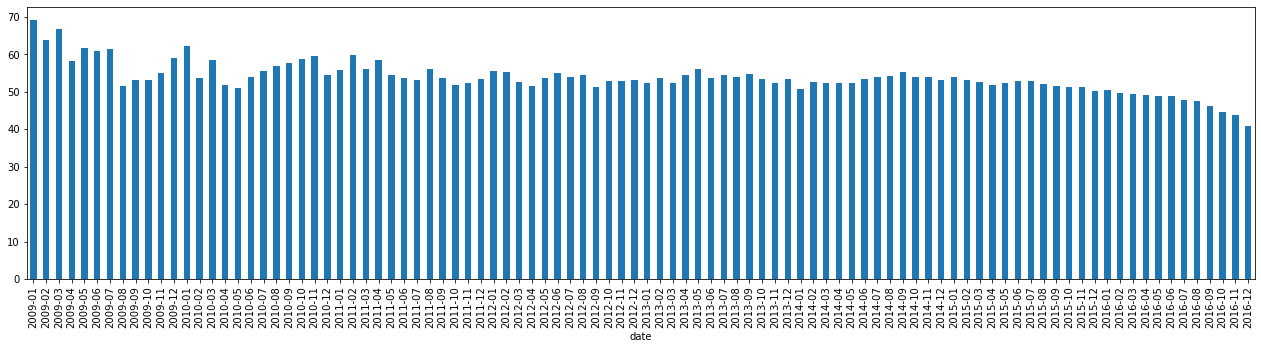

In [19]:
plt.figure(figsize=(22,5))
percentuais_mes['%'].plot.bar()

#### 4. Percentualmente, olhando a variável subreddit, qual o assunto que mais gera comentários sarcásticos? Considere apenas assuntos com mais de 1000 comentários.

In [126]:
percentuais_mes = pd.DataFrame()
percentuais_mes['qtd'] = dfcomentarios.groupby('subreddit')['subreddit'].count()
percentuais_mes['qtd_sarc'] = dfcomentarios[dfcomentarios['label'] == 1].groupby('subreddit')['label'].count()
percentuais_mes['%'] = round((percentuais_mes['qtd_sarc']/percentuais_mes['qtd'])*100, 1)
percentuais_mes[percentuais_mes['qtd'] > 1000].sort_values(by='%', ascending=False).head(1)

,qtd,qtd_sarc,%
subreddit,,,
creepyPMs,5466,4287.0,78.4


In [21]:
percentuais_mes[percentuais_mes['qtd'] > 100].sort_values(by='%', ascending=False).head()

,qtd,qtd_sarc,%
subreddit,,,
creepyPMs,5466,4287.0,78.4
circlebroke,174,128.0,73.6
ShitPoliticsSays,285,204.0,71.6
progun,541,384.0,71.0
AndroidMasterRace,156,110.0,70.5


#### 5. Por tipo de comentário (sarcástico ou não), quantas palavras temos em média em comment_wcount e parent_comment_wcount?

In [22]:
dfcomentarios.groupby('label')[['parent_comment_wcount', 'comment_wcount']].mean()

,parent_comment_wcount,comment_wcount
label,,
0,24.562694,10.591973
1,24.210784,10.330915


#### 6. Comentários sarcásticos são maiores ou menores em relação aos comentários normais? Use o campo comment_char criado anteriormente para mostrar essa relação através de gráficos de distribuição.

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='comment_char', ylabel='Density'>

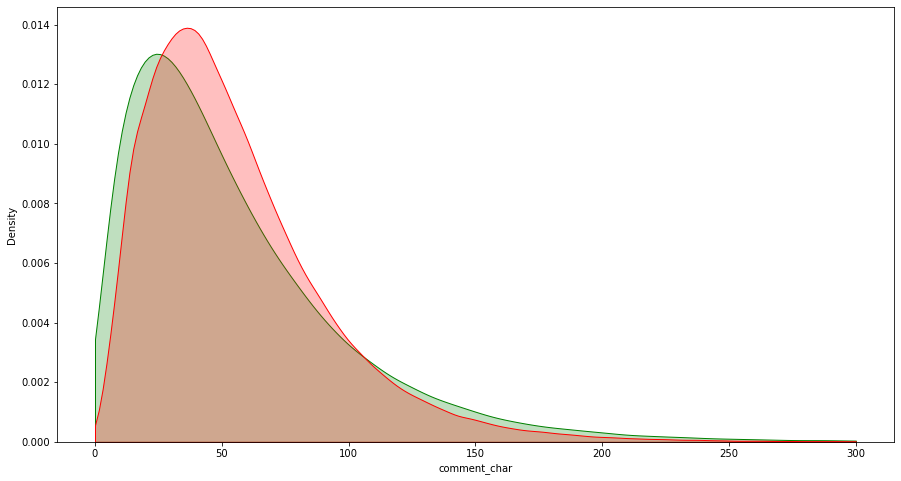

In [24]:
plt.figure(figsize=(15,8))
sns.kdeplot(dfcomentarios[dfcomentarios['label'] == 0]['comment_char'], shade=True,label='Normal', color='green', clip = (0,300))
sns.kdeplot(dfcomentarios[dfcomentarios['label'] == 1]['comment_char'], shade=True, label='Sarcasmo', color='red', clip = (0,300))

### 6 - Se uníssimos comment e parent_comment em uma só mensagem, percentualmente em média, quanto representaria comment em relação a mensagem unida. Utilize os campos comment_char e parent_comment_char que criamos anteriormente.

In [41]:
(dfcomentarios['comment_char'] / (dfcomentarios['comment_char'] + dfcomentarios['parent_comment_char'])*100).head()

0    11.111111
1    35.576923
2    84.027778
3    69.767442
4    26.724138
dtype: float64

### Crie uma função que faça as transformações necessárias no texto: 
####  a. Retire pontuações
####  b. Remova stopwords
####  c. Normalize no seu sentido mais abstrato (stemming)

In [26]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
!conda install nltk

Solving environment: done

# All requested packages already installed.



In [29]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.corpus import stopwords

In [32]:
from nltk.stem import PorterStemmer

In [75]:
def transfTexto(msg):
    
    semPonto = [c for c in msg if c not in string.punctuation]
    
    semPonto = ''.join(semPonto)
    
    remStWords = [palavra for palavra in semPonto.split() if palavra.lower() not in stopwords.words('english')]

    st = PorterStemmer()
    return [st.stem(stPalavra) for stPalavra in remStWords]

In [105]:
dfFrac = dfcomentarios.sample(frac=0.001, replace=True, random_state=1).copy()
dfFrac.reset_index(inplace=True, drop=True)

In [106]:
dfFrac.head()

,label,comment,author,subreddit,score,date,parent_comment,comment_wcount,parent_comment_wcount,comment_char,parent_comment_char
0,0,Nancy Grace is a step up compared to him,JangoDarkSaber,videos,1.0,2016-07,He's the Nancy Grace of Youtube.,9.0,6,40,32
1,0,The only certification you need is to be sure ...,traxxas,linux,1.0,2012-07,doesn't lenovo get most thinkpads ubuntu certi...,19.0,7,101,51
2,0,"Is that to keep that bad guys out, or *you* in?",analogkid1,WTF,1.0,2012-07,"So we're on vacation, and this is our bedrooms...",11.0,11,47,58
3,1,"Yeah, she should have just let those brown peo...",midoman111,worldnews,-28.0,2015-09,Hopefully she'll be imprisoned for treason.,10.0,6,54,43
4,0,He really shouldn't have gone back into the game.,jh1336,hockey,7.0,2013-06,He had no business sitting on the bench with t...,9.0,22,49,108


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
vetorizador = CountVectorizer(analyzer=transfTexto).fit(dfFrac['comment'])

In [108]:
msVet = vetorizador.transform(dfFrac['comment'])

In [109]:
msVet.shape

(1011, 2583)

In [110]:
msVetPandas = pd.DataFrame(msVet.todense(), columns=vetorizador.get_feature_names())

In [111]:
msWC = pd.DataFrame()
msWC = pd.concat([dfFrac['label'], msVetPandas], axis=1)

In [112]:
msWC.head()

,label,0,010,1,10,100,1000,1000000,1080,11,...,youim,youll,younger,your,youtub,youv,yumm,yup,zero,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
from sklearn.feature_extraction.text import TfidfTransformer

In [118]:
vetorizadorTFIDF = TfidfTransformer().fit(msVetPandas)

In [119]:
msWCTFIDF = vetorizadorTFIDF.transform(msVetPandas)

In [121]:
msWCTFIDFPandas = pd.DataFrame(msWCTFIDF.todense(), columns=vetorizador.get_feature_names())

In [122]:
msWCTFIDF = pd.DataFrame()
msWCTFIDF = pd.concat([dfFrac['label'], msVetPandas], axis=1)

In [123]:
msWCTFIDF.head()

,label,0,010,1,10,100,1000,1000000,1080,11,...,youim,youll,younger,your,youtub,youv,yumm,yup,zero,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# os valores de TF-IDF ficam disponíveis na propriedade idf_ do objeto vetorizado, podemos buscar os valores da seguinte forma:
top10 = pd.DataFrame(vetorizadorTFIDF.idf_, index=vetorizador.get_feature_names(),columns=['TF-IDF'])
top10.sort_values(by=['TF-IDF'], ascending=False).head(10)

,TF-IDF
jungl,7.226537
news,7.226537
network,7.226537
netscap,7.226537
nerv,7.226537
nerd,7.226537
neoliber,7.226537
neighborhood,7.226537
neighbor,7.226537
neg,7.226537
